In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from sklearn.datasets import load_breast_cancer
from utils import *

In [2]:
"""Load and return the breast cancer wisconsin dataset.
The breast cancer dataset is a classic and very easy binary classification dataset.
"""
data = load_breast_cancer(return_X_y=True, as_frame=True)
len(data)

2

In [3]:
data[0]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# preparing the target
y = np.array(data[1].iloc[0:500])
print(np.unique(y, return_counts=True))

y_test = np.array(data[1].iloc[500:])
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([195, 305]))
(array([0, 1]), array([17, 52]))


In [5]:
# preparing the data
X = np.array(data[0].iloc[0:500, :])
X_test = np.array(data[0].iloc[500:, :])

# centering and normal standardization
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()
    X_test[:,i] = (X_test[:,i] - X_test[:,i].mean())/X_test[:,i].std()


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train.reshape((len(y_train), 1))
y_val = y_val.reshape((len(y_val), 1))

### Train a perceptron model

train_loss : 2.044669531747498 val_loss : 2.1715646887562268 train_acc : 0.62 val_acc : 0.52 norm_gradL : 1.1537474798636567
train_loss : 1.198066980263906 val_loss : 1.2532038379725388 train_acc : 0.72 val_acc : 0.67 norm_gradL : 0.7281784939467769
train_loss : 0.816128964387409 val_loss : 0.8514666240681785 train_acc : 0.78 val_acc : 0.75 norm_gradL : 0.5220552875136731
train_loss : 0.6084171134573503 val_loss : 0.6454461192364548 train_acc : 0.82 val_acc : 0.82 norm_gradL : 0.39559711995951435
train_loss : 0.48423406403552 val_loss : 0.528676240935905 train_acc : 0.8475 val_acc : 0.84 norm_gradL : 0.31191858470179507
train_loss : 0.40627053065737245 val_loss : 0.4600575231956036 train_acc : 0.8825 val_acc : 0.87 norm_gradL : 0.24901935272424228
train_loss : 0.3544019718550365 val_loss : 0.41469009146178004 train_acc : 0.8875 val_acc : 0.88 norm_gradL : 0.2092265611683441
train_loss : 0.3160459728968098 val_loss : 0.3797033241114776 train_acc : 0.8925 val_acc : 0.89 norm_gradL : 0.18

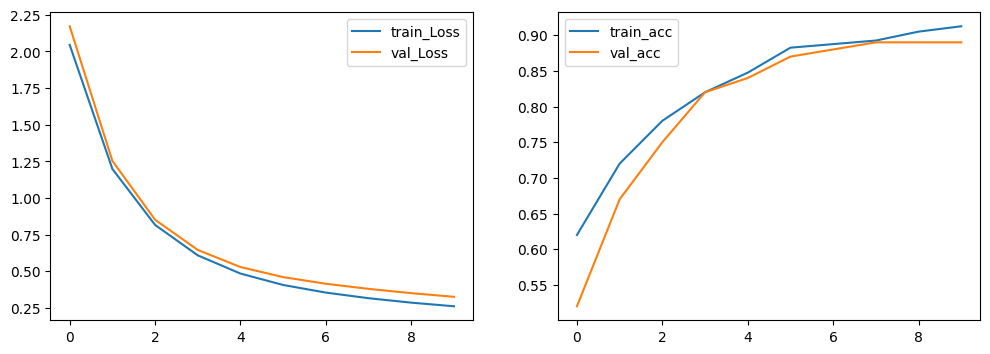

In [7]:
W, b, norm_gradL=perceptron(X_train, y_train, X_val, y_val, learning_rate=0.001, err=1e-5, max_iter=10000)

### Make a prediction on the test data 

In [8]:
y_test_pred = predict(X_test, W, b)
print("test accuracy :", accuracy(y_test, y_test_pred))

test accuracy : 40.333333333333336


In [12]:
predict(X_test, W, b, proba=True)

array([[2.58146730e-01],
       [1.54616189e-02],
       [6.73020764e-01],
       [6.02343127e-15],
       [9.00697302e-01],
       [6.39464591e-01],
       [9.24359258e-01],
       [9.83291821e-01],
       [2.18863241e-03],
       [6.63299974e-04],
       [9.33147754e-01],
       [1.58770986e-01],
       [1.48372810e-02],
       [2.28634573e-02],
       [7.88207488e-02],
       [9.65282036e-01],
       [5.86453578e-06],
       [1.82990814e-07],
       [7.30396856e-01],
       [5.40547144e-01],
       [8.25700757e-01],
       [4.30881752e-14],
       [9.99987309e-01],
       [4.88623014e-01],
       [9.99756885e-01],
       [9.99836789e-01],
       [5.13040639e-01],
       [9.70819373e-01],
       [3.25259076e-02],
       [8.87406480e-01],
       [9.86305863e-01],
       [9.84861807e-01],
       [9.01578497e-01],
       [1.69630288e-08],
       [9.97061852e-01],
       [5.14777673e-09],
       [5.86315348e-01],
       [8.62939416e-01],
       [9.99997826e-01],
       [9.99913651e-01],
